In [76]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

### Getting the data (function)

In [77]:
def symbol_to_path(symbol, base_dir='../data'):
    # Return CSV file path given ticker symbol.
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

In [78]:
def get_data(symbols, dates):
    # Read stock data (adjusted close) for given symbols from CSV files.
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = 'Date', 
                             parse_dates = True, usecols = ['Date', 'Adj Close'],
                             na_values = ['nan'])
        
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp)
        
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
            
    return df

### Plotting the data (function)

In [79]:
def plot_data(df, title = 'Stock Prices'):
    
    ax = df.plot(title = title, fontsize = 2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

### Normalizing the dataframe (function)

In [80]:
def normalized_data(df):
    return df / df.ix[0, : ]

### Compute portfolio value (function)

In [81]:
def compute_portfolio_value(prices, allocs, start_val = 1):
    
    normed = normalized_data(prices)
    alloced = normed * allocs
    pos_vals = alloced * start_val
    port_val = pos_vals.sum(axis = 1)
    
    return port_val

### Compute portfolio statistics (function)

In [82]:
def compute_portfolio_statistics(port_val, freq_sample = 252):
    
    # Compute daily returns
    daily_rets = port_val.copy()
    daily_rets[1:] = (port_val[1:] / port_val[:-1].values) - 1
    daily_rets[0] = 0
    daily_rets = daily_rets[1:]
    
    # compute cumulative returns
    cum_ret = (port_val[-1]/port_val[0]) - 1
    
    avg_daily_ret = daily_rets.mean()
    std_daily_ret = daily_rets.std()
    
    # Compute Sharpe ratio
    daily_rf = 0
    sr = (freq_sample**.5) * ((daily_rets - daily_rf).mean() / std_daily_ret)
    
    return(cum_ret, avg_daily_ret, std_daily_ret, sr)

### Reading and plotting data

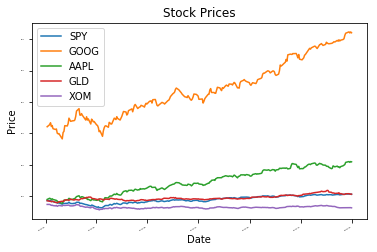

In [85]:
start_date = dt.datetime(2009,1,1)  
end_date = dt.datetime(2010,1,1) 
dates = pd.date_range(start_date, end_date)
symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
prices = get_data(symbols, dates)
plot_data(prices)

### Portfolio value

/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


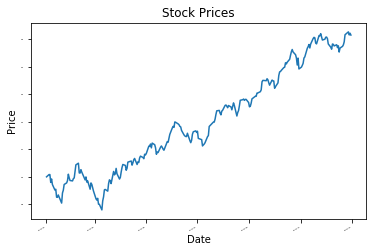

In [86]:
allocs = [0.2, 0.2, 0.2, 0.2, 0.2]
port_val = compute_portfolio_value(prices, allocs, start_val = 1)
plot_data(port_val)

### Portfolio statistics

In [87]:
cum_ret, avg_daily_ret, std_daily_ret, sr = compute_portfolio_statistics(
    port_val, freq_sample = 252)

In [88]:
print('Start Date:', start_date) 
print('End Date:', end_date)  
print('Symbols:', symbols)   
print('Sharpe Ratio:', sr) 
print('Volatility (stdev of daily returns):', std_daily_ret)
print('Average Daily Return:', avg_daily_ret)

Start Date: 2009-01-01 00:00:00
End Date: 2010-01-01 00:00:00
Symbols: ['SPY', 'GOOG', 'AAPL', 'GLD', 'XOM']
Sharpe Ratio: 2.1166792174040014
Volatility (stdev of daily returns): 0.013069372403837064
Average Daily Return: 0.001742647342806132
